In [1]:
import pathlib
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt




import SessionTools.two_photon as st2p
import NeuromodPlasticity as nmp


plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 



In [4]:
basedir = pathlib.Path('/media/mplitt/SSD_storage/2P_scratch/EL_jGCaMP7f_CsChrimsontdT')
sess_df = pd.read_csv(basedir / 'sessions.csv')
# sess_df = sess_df.iloc[:-1]
print(sess_df.columns)
sess_df['fly_id'] = [row['date']+'_'+row['fly'] +'_' + row['condition'] for _, row in sess_df.iterrows()]
sess_df['mean offset'] = [np.nan for _, row in sess_df.iterrows()]
sess_df['offset var.'] = [np.nan for _, row in sess_df.iterrows()]
sess_df['mean vec. len'] = [np.nan for _, row in sess_df.iterrows()]

sess_df = sess_df.loc[sess_df['usable']==1]


figfolder = pathlib.Path('/media/mplitt/SSD_storage/fig_scratch/EL_jGCaMP7f_CsChrimsontdT')
figfolder.mkdir(parents=True, exist_ok=True)

Index(['date', 'fly', 'sess', 'fictrac_scan_num', 'fictrac_file', 'condition',
       'scan_type', 'usable'],
      dtype='object')


In [6]:
sess_df.head()

,date,fly,sess,fictrac_scan_num,fictrac_file,condition,scan_type,usable,fly_id,mean offset,offset var.,mean vec. len
0,14_08_2024,fly1,baseline-000,0,fictrac-20240814_134318.dat,remap,baseline,1,14_08_2024_fly1_remap,NaN,NaN,NaN
1,14_08_2024,fly1,remap_0deg-002,2,fictrac-20240814_134318.dat,remap,remap_0deg,1,14_08_2024_fly1_remap,NaN,NaN,NaN
2,14_08_2024,fly1,post_0deg-003,3,fictrac-20240814_134318.dat,remap,post_0deg,1,14_08_2024_fly1_remap,NaN,NaN,NaN
3,14_08_2024,fly1,remap_180deg-005,5,fictrac-20240814_134318.dat,remap,remap_180deg,1,14_08_2024_fly1_remap,NaN,NaN,NaN
4,14_08_2024,fly1,post_180deg-007,7,fictrac-20240814_134318.dat,remap,post_180deg,1,14_08_2024_fly1_remap,NaN,NaN,NaN


In [7]:
def load_row(row):
    outdir = pathlib.PurePath( basedir / row['date'] / row['fly'] / row['sess'] / 'preprocess.pkl')
    return st2p.preprocessing.EBImagingSession.from_file(outdir)

In [8]:
opto_responses = {
    'remap': {'remap_0deg': [], 'remap_180deg': [], 'combined':[]}, 
}

##
sess_df_remap0 = sess_df.loc[sess_df['scan_type']=='remap_0deg']
remap = sess_df_remap0.loc[sess_df_remap0['condition']=='remap']
opto_responses['remap']['remap_0deg'] = np.stack([nmp.remapping.get_opto_resp(load_row(row)) for _, row in remap.iterrows()])


##
sess_df_remap180 = sess_df.loc[sess_df['scan_type']=='remap_180deg']
remap = sess_df_remap180.loc[sess_df_remap180['condition']=='remap']
opto_responses['remap']['remap_180deg'] = np.stack([nmp.remapping.get_opto_resp(load_row(row)) for _, row in remap.iterrows()])



opto_responses['remap']['combined'] = (opto_responses['remap']['remap_0deg'] + opto_responses['remap']['remap_180deg'])/2





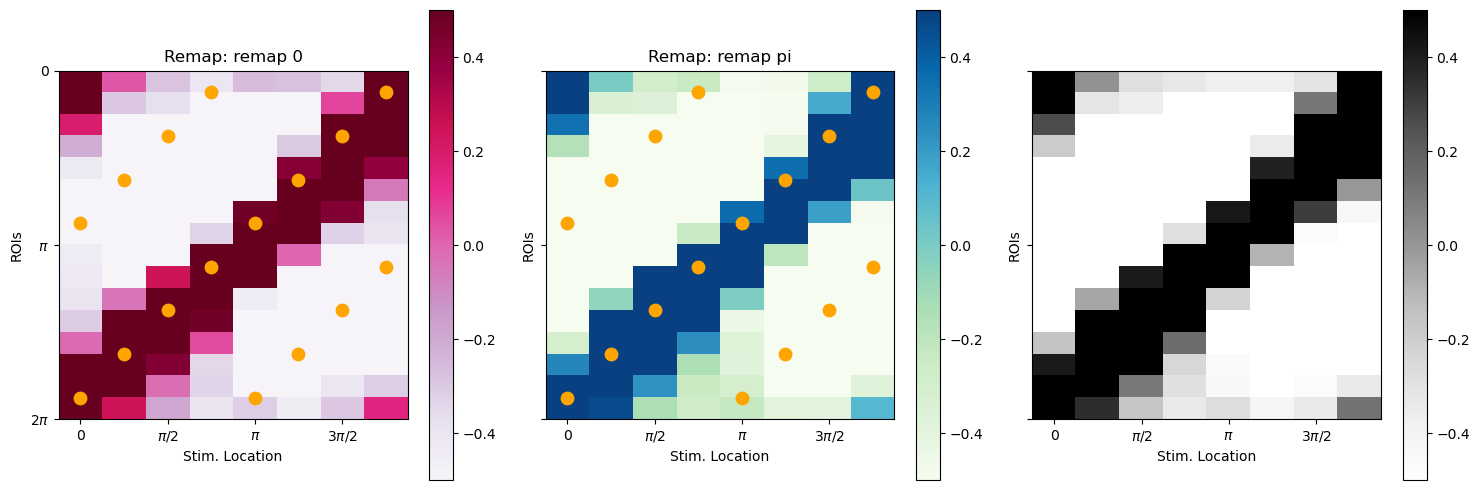

In [ ]:
fig, ax = plt.subplots(1,3,figsize=[15,5],sharex=True,sharey=True)
h = ax[0].imshow(np.nanmean(opto_responses['remap']['remap_0deg'],axis=(0,3)),aspect=.5, vmin=-.5, vmax=.5, cmap='PuRd')
fig.colorbar(h, ax=ax[0])
h = ax[1].imshow(np.nanmean(opto_responses['remap']['remap_180deg'],axis=(0,3)),aspect=.5, vmin=-.5, vmax=.5, cmap='GnBu')
fig.colorbar(h, ax=ax[1])
h = ax[2].imshow(np.nanmean(opto_responses['remap']['combined'],axis=(0,3)),aspect=.5, vmin=-.5, vmax=.5, cmap='Greys')
fig.colorbar(h, ax=ax[2])

ax[0].set_title('Remap: remap 0')
ax[1].set_title('Remap: remap pi')



# h = ax[1,0].imshow(np.nanmean(opto_responses['no_chrimson']['remap_0deg'],axis=(0,3)),aspect=.5, vmin=-.5, vmax=.5, cmap='PuRd')
# fig.colorbar(h, ax=ax[1,0])
# h = ax[1,1].imshow(np.nanmean(opto_responses['no_chrimson']['remap_180deg'],axis=(0,3)),aspect=.5, vmin=-.5, vmax=.5, cmap='GnBu')
# fig.colorbar(h, ax=ax[1,1])
# h = ax[1,2].imshow(np.nanmean(opto_responses['no_chrimson']['combined'],axis=(0,3)),aspect=.5, vmin=-.5, vmax=.5, cmap='Greys')
# fig.colorbar(h, ax=ax[1,2])

# ax[1, 0].set_title('No ChR: remap 0')
# ax[1, 1].set_title('No ChR: remap pi')

# h = ax[2,0].imshow(np.nanmean(opto_responses['novis_control']['remap_novis'],axis=(0,3)), aspect=.5, vmin=-.5, vmax=.5, cmap='Greys')
# fig.colorbar(h, ax=ax[2,0])

# ax[2,0].set_title('No vis')



x = np.arange(8)
y = np.arange(0,2*np.pi,np.pi/4)[::-1]*8/np.pi+.5
h = ax[0].scatter(x,y,color= 'orange',s=80)


y = np.roll(y,4)
ax[1].scatter(x,y,color='orange',s=80)
    

for a in ax.flatten():
    a.set_ylabel('ROIs')
    a.set_xlabel('Stim. Location')
    
    a.set_xticks([0,2,4,6], labels=[r'0',r'$\pi$/2', r'$\pi$', r'3$\pi$/2'])
    a.set_yticks([-.5,7.5,15.5], labels=[r'0',r'$\pi$', r'2$\pi$'])

fig.tight_layout()
fig.savefig( figfolder / 'opto_resp_heatmaps.pdf')

In [12]:
opto_resp_al = {}
for ck in ('remap',):
    opto_resp_al[ck] = {}
    for rk in opto_responses[ck].keys():
        opto = np.copy(opto_responses[ck][rk])
        for i in range(8):
            opto[:,:,i,:] = np.roll(opto[:,:,i,:],2*i-8, axis=1)
            
        opto_resp_al[ck][rk] = opto

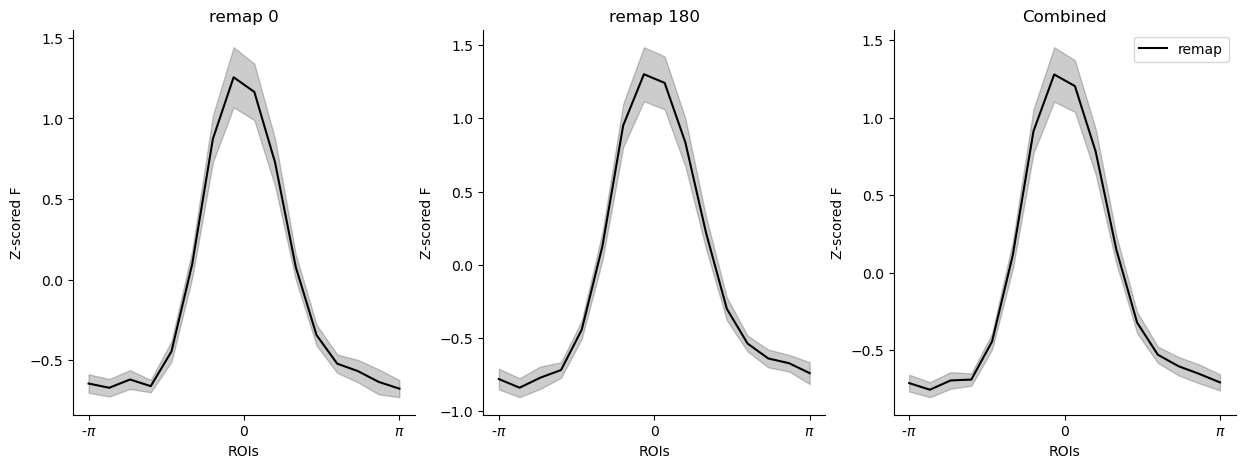

In [14]:
fig, ax = plt.subplots(1,3, figsize=[15,5])
x = np.linspace(-np.pi, np.pi, num=16)

remap_resp = opto_resp_al['remap']['remap_0deg'].mean(axis=(2,3))


mu, sem = remap_resp.mean(axis=0), sp.stats.sem(remap_resp, axis=0)
ax[0].plot(x, mu, color='black')
ax[0].fill_between(x, mu-sem, mu+sem, color='black', alpha=.2)



ax[0].set_title('remap 0')

remap_resp = opto_resp_al['remap']['remap_180deg'].mean(axis=(2,3))


mu, sem = remap_resp.mean(axis=0), sp.stats.sem(remap_resp, axis=0)
ax[1].plot(x, mu, color='black')
ax[1].fill_between(x, mu-sem, mu+sem, color='black', alpha=.2)



ax[1].set_title('remap 180')

remap_resp = np.stack((opto_resp_al['remap']['remap_0deg'].mean(axis=(2,3)), opto_resp_al['remap']['remap_180deg'].mean(axis=(2,3)))).mean(axis=0)


mu, sem = remap_resp.mean(axis=0), sp.stats.sem(remap_resp, axis=0)
ax[2].plot(x, mu, color='black', label='remap')
ax[2].fill_between(x, mu-sem, mu+sem, color='black', alpha=.2)



ax[2].set_title('Combined')
ax[2].legend()



for a in ax.flatten():
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

    a.set_ylabel('Z-scored F')
    a.set_xlabel('ROIs')

    _ = a.set_xticks([-np.pi, 0, np.pi], labels = [r'-$\pi$', '0', r'$\pi$'])

fig.savefig( figfolder / "aligned_opto_resp.pdf")

In [17]:
nonremap_sess_df = sess_df.loc[(sess_df['scan_type']=='baseline') | \
                               (sess_df['scan_type']=='post_0deg') | \
                               (sess_df['scan_type']=='post_180deg')]
flies = nonremap_sess_df['fly_id'].unique()
for index,row in nonremap_sess_df.iterrows():
    ts = nmp.session.GetTS(load_row(row))
    
    
    offset_c_mu = ts.offset_c.mean()
    
    sess_df.loc[index, 'mean offset'] = np.angle(offset_c_mu)
    sess_df.loc[index, 'mean vec. len'] = np.abs(offset_c_mu)
    sess_df.loc[index, 'offset var.'] = sp.stats.circvar(ts.offset)

In [18]:
sess_df.loc[sess_df['scan_type'].isin(('baseline', 'post_0deg', 'post_180deg'))]

,date,fly,sess,fictrac_scan_num,fictrac_file,condition,scan_type,usable,fly_id,mean offset,offset var.,mean vec. len
0,14_08_2024,fly1,baseline-000,0,fictrac-20240814_134318.dat,remap,baseline,1,14_08_2024_fly1_remap,-2.512883,0.664416,0.335584
2,14_08_2024,fly1,post_0deg-003,3,fictrac-20240814_134318.dat,remap,post_0deg,1,14_08_2024_fly1_remap,0.397387,0.375961,0.624039
4,14_08_2024,fly1,post_180deg-007,7,fictrac-20240814_134318.dat,remap,post_180deg,1,14_08_2024_fly1_remap,-1.967269,0.679978,0.320022
10,14_08_2024,fly3,baseline-000,0,fictrac-20240814_155908.dat,remap,baseline,1,14_08_2024_fly3_remap,1.470589,0.697782,0.302218
12,14_08_2024,fly3,post_0deg-003,3,fictrac-20240814_155908.dat,remap,post_0deg,1,14_08_2024_fly3_remap,0.148294,0.474350,0.525650
14,14_08_2024,fly3,post_180deg-005,5,fictrac-20240814_155908.dat,remap,post_180deg,1,14_08_2024_fly3_remap,-2.968344,0.740464,0.259536
15,15_08_2024,fly1,baseline-000,0,fictrac-20240815_091154.dat,remap,baseline,1,15_08_2024_fly1_remap,-0.398607,0.610778,0.389222
17,15_08_2024,fly1,post_180deg-002,2,fictrac-20240815_091154.dat,remap,post_180deg,1,15_08_2024_fly1_remap,-2.592951,0.580167,0.419833
19,15_08_2024,fly1,post_0deg-004,4,fictrac-20240815_091154.dat,remap,post_0deg,1,15_08_2024_fly1_remap,-0.079166,0.508630,0.491370
20,15_08_2024,fly2,baseline-001,1,fictrac-20240815_100642.dat,remap,baseline,1,15_08_2024_fly2_remap,-1.193952,0.565322,0.434678


/tmp/ipykernel_2264988/3392514766.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=tmp_sess_df, x='scan_type', y='mean vec. len', ax=ax,


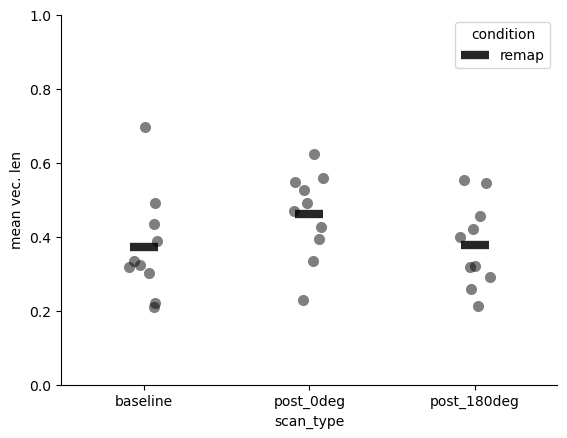

In [21]:
import seaborn as sns
fig, ax = plt.subplots()

tmp_sess_df = sess_df.loc[sess_df['scan_type'].isin(('baseline', 'post_0deg', 'post_180deg'))]


sns.stripplot(data=tmp_sess_df, x='scan_type', y='mean vec. len', ax=ax, alpha=.5,
            dodge=True, color='black', s=8, legend=False)
sns.pointplot(data=tmp_sess_df, x='scan_type', y='mean vec. len', ax=ax, 
              hue='condition', color='black',
              estimator=np.mean, errorbar=None, marker='_', markersize=20, 
              markeredgewidth=6, legend=True, linestyle='none')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([0,1])
fig.savefig(figfolder / "remapping_vec_len_comparison.pdf")


In [22]:
def build_sum_stats(fly_list):
    sum_stats = {'fly_id': []}
    for s in ('baseline', 'post_0deg', 'post_180deg'):
        sum_stats[f'{s} mean offset'] = []
        sum_stats[f'{s} vec. len'] = []
        sum_stats[f'{s} offset var.'] = []
            
    
    
    
    for fly in fly_list:
        sum_stats['fly_id'].append(fly)
        
        
        for s in ('baseline', 'post_0deg', 'post_180deg'):
            sum_stats[f'{s} mean offset'].append(sess_df.loc[(sess_df['fly_id']==fly) & (sess_df['scan_type']==s)]['mean offset'].mean())
            sum_stats[f'{s} vec. len'].append(sess_df.loc[(sess_df['fly_id']==fly) & (sess_df['scan_type']==s)]['mean vec. len'].mean())
            sum_stats[f'{s} offset var.'].append(sess_df.loc[(sess_df['fly_id']==fly) & (sess_df['scan_type']==s)]['offset var.'].mean())
        
    return pd.DataFrame(sum_stats)                
        
    

In [23]:
remap_flies = [fly for fly in flies if 'remap' in fly]
remap_sum_stats = build_sum_stats(remap_flies)

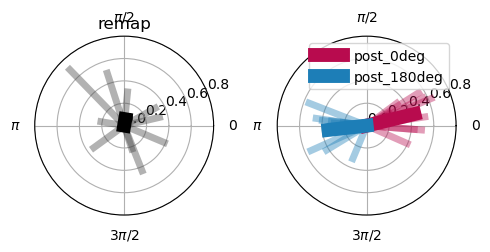

In [26]:
fig, ax = plt.subplots(1, 2, subplot_kw={'projection':'polar'}, figsize=[5,10])

for _, row in remap_sum_stats.iterrows():
    ax[0].plot(row['baseline mean offset']*np.ones([2,]), [0, row['baseline vec. len']], color=plt.cm.Greys(.8), alpha=.4, linewidth=5)
    
    ax[1].plot(row['post_0deg mean offset']*np.ones([2,]), [0, row['post_0deg vec. len']], color=plt.cm.PuRd(.8), alpha=.4, linewidth=5)
    ax[1].plot(row['post_180deg mean offset']*np.ones([2,]), [0, row['post_180deg vec. len']], color=plt.cm.GnBu(.8), alpha=.4, linewidth=5)

baseline_v = remap_sum_stats['baseline vec. len']*(np.cos(remap_sum_stats['baseline mean offset'])+1j*np.sin(remap_sum_stats['baseline mean offset']))
ax[0].plot(np.angle(baseline_v.mean())*np.ones((2,)), np.absolute(baseline_v.mean())*np.array([0,1]), color='black', linewidth=10)

post_0deg_v = remap_sum_stats['post_0deg vec. len']*(np.cos(remap_sum_stats['post_0deg mean offset'])+1j*np.sin(remap_sum_stats['post_0deg mean offset']))
ax[1].plot(np.angle(post_0deg_v.mean())*np.ones((2,)), np.absolute(post_0deg_v.mean())*np.array([0,1]), 
             color=plt.cm.PuRd(.8), linewidth=10, label='post_0deg')

post_180deg_v = remap_sum_stats['post_180deg vec. len']*(np.cos(remap_sum_stats['post_180deg mean offset'])+1j*np.sin(remap_sum_stats['post_180deg mean offset']))
ax[1].plot(np.angle(post_180deg_v.mean())*np.ones((2,)), np.absolute(post_180deg_v.mean())*np.array([0,1]), 
             color=plt.cm.GnBu(.8), linewidth=10, label='post_180deg')

ax[1].legend()

for a in ax.flatten():
    a.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2], ['0', r'$\pi$/2', r'$\pi$', r'3$\pi$/2'])
    a.set_yticks([0,.2,.4,.6, .8])
    a.set_ylim([0,.8])

ax[0].set_title('remap')



fig.tight_layout()

fig.savefig(figfolder / "remapping_all_flies_polar.pdf")

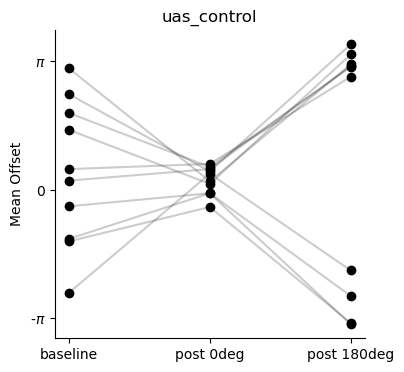

In [28]:
fig, ax = plt.subplots(figsize=[4,4], sharex=True, sharey=True)
nmp.remapping.plot_min_dist(remap_sum_stats, ax, color='black')
ax.set_title('uas_control')



ax.set_xticks([0,1,2], ['baseline', 'post 0deg', 'post 180deg'])
ax.set_yticks([-np.pi,0,np.pi], [r'-$\pi$', '0', r'$\pi$'])
ax.set_ylabel('Mean Offset')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig(figfolder / "remapping_all_flies.pdf")

In [29]:
def avg_diff(sum_stats):
    
    diff0 = np.abs(sum_stats['post_0deg mean offset'] )
    diff180 = np.abs(np.pi - sum_stats['post_180deg mean offset'] )
    diff180 = np.minimum(diff180, 2*np.pi-diff180)
                
    return (diff0+diff180)/2

remap error less than chance: t=0.0, p=0.001953125


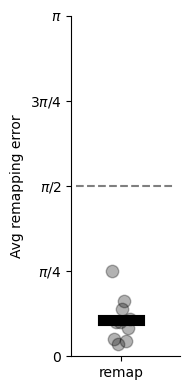

In [33]:
fig, ax = plt.subplots(figsize=[2,4])

remap_avg_diff = avg_diff(remap_sum_stats)
n_remap = remap_avg_diff.shape[0]
ax.scatter(np.linspace(0,.1,num=n_remap), remap_avg_diff, color='black', alpha=.3, s=80)
ax.plot([-.05,.15], remap_avg_diff.mean()*np.ones([2,]), color='black', linewidth=8)





ax.plot([-.2,.35], [np.pi/2, np.pi/2], 'k--', alpha=.5, zorder=-1)

ax.set_xticks([.05,], labels=['remap', ])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Avg remapping error')
_ = ax.set_yticks([0,np.pi/4,np.pi/2,3*np.pi/4, np.pi], labels=[0, r"$\pi$/4", r"$\pi$/2", r"$3\pi$/4", r"$\pi$"])

fig.tight_layout()


t, p = sp.stats.wilcoxon(remap_avg_diff - np.pi/2)
print(f"remap error less than chance: t={t}, p={p}")


fig.savefig(figfolder / "remapping_error.pdf")

/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/remapping.py:143: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig_polar, ax_polar = plt.subplots(subplot_kw={'projection':'polar'})


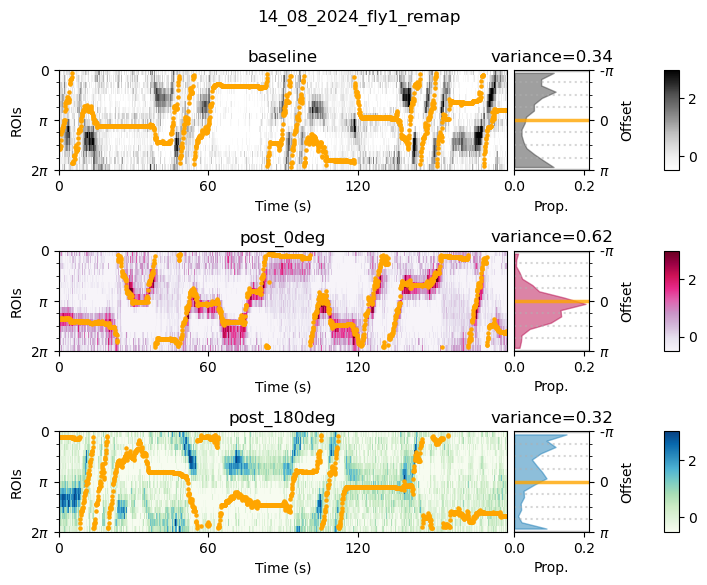

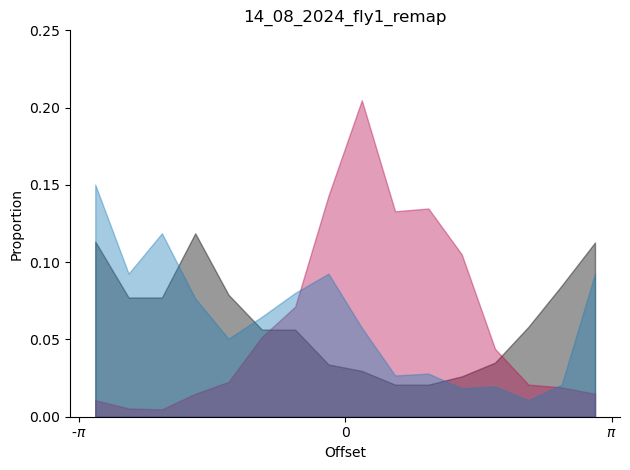

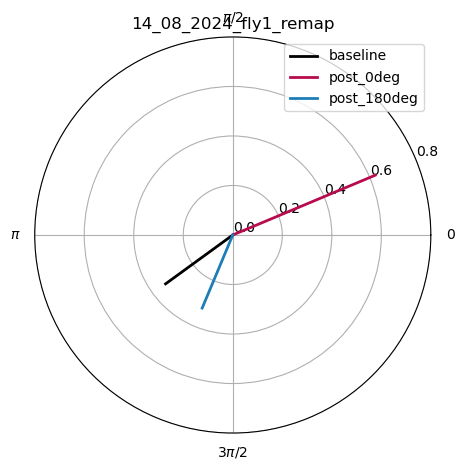

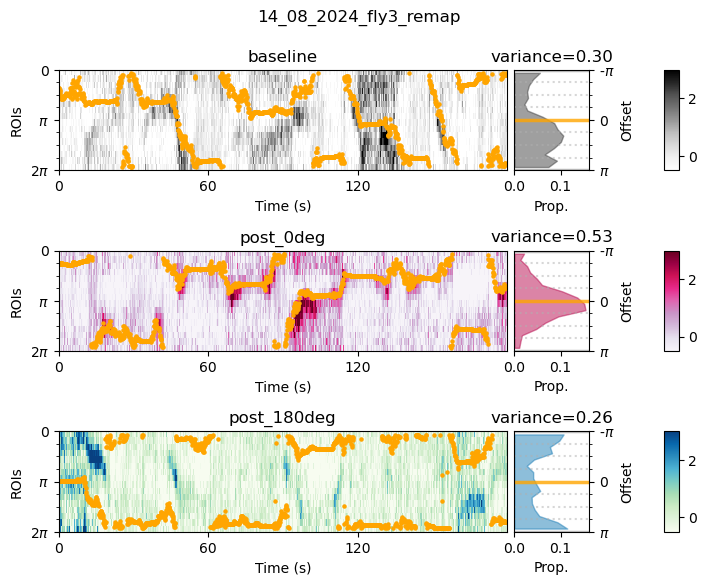

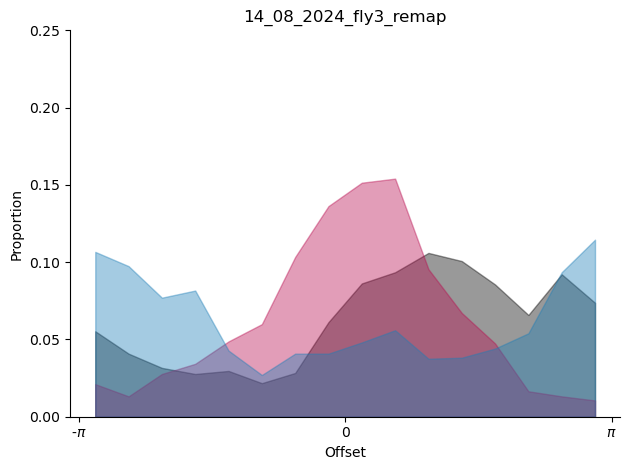

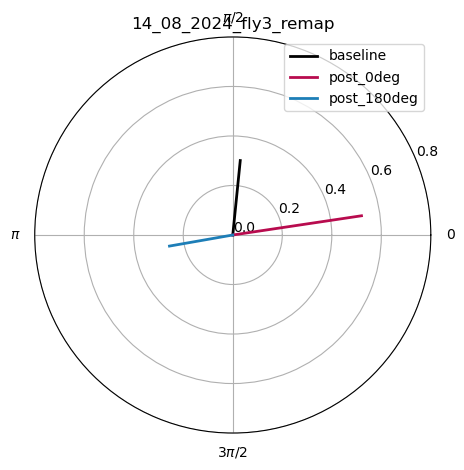

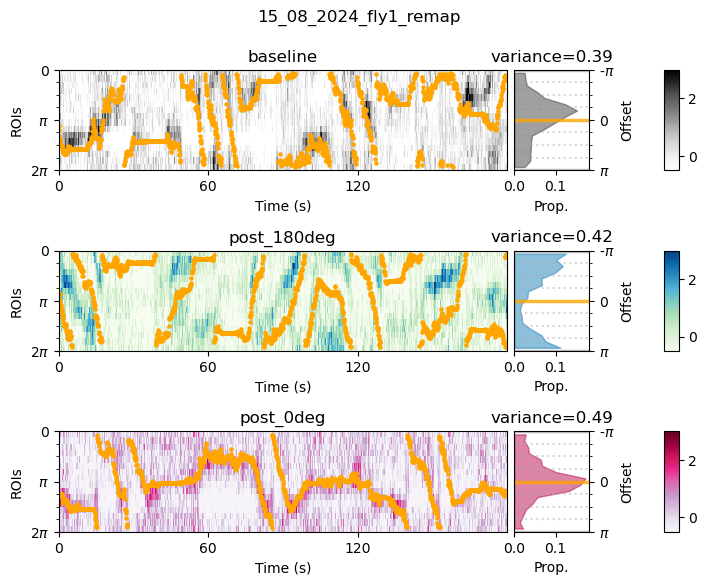

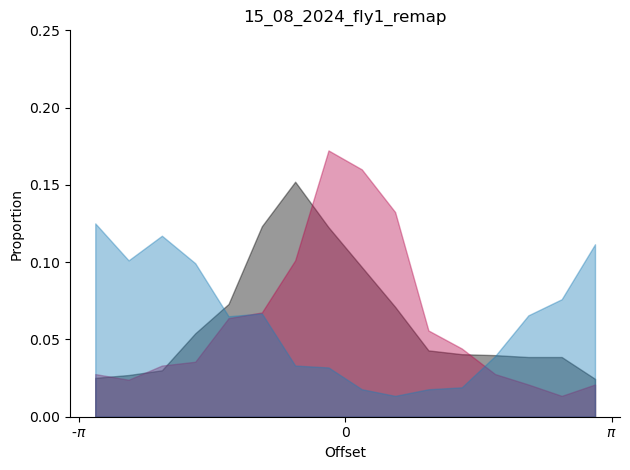

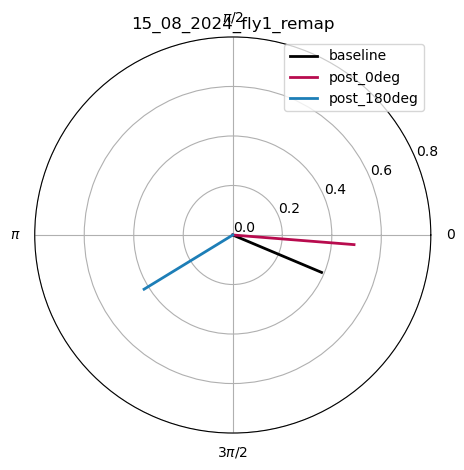

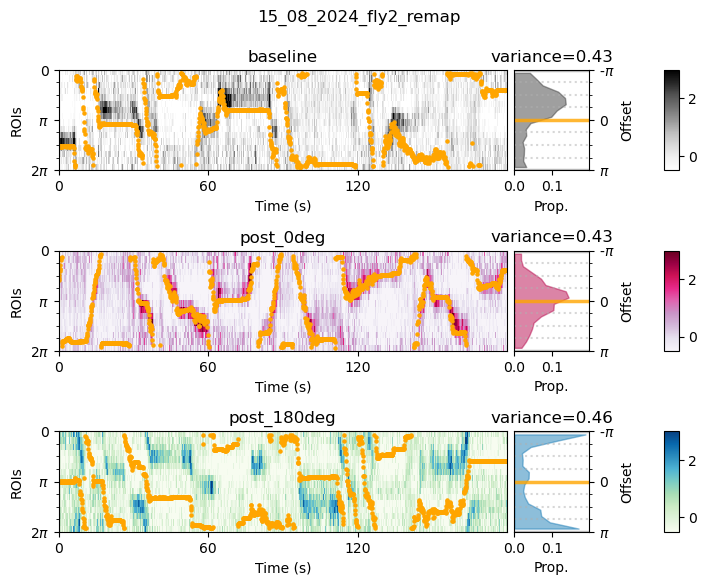

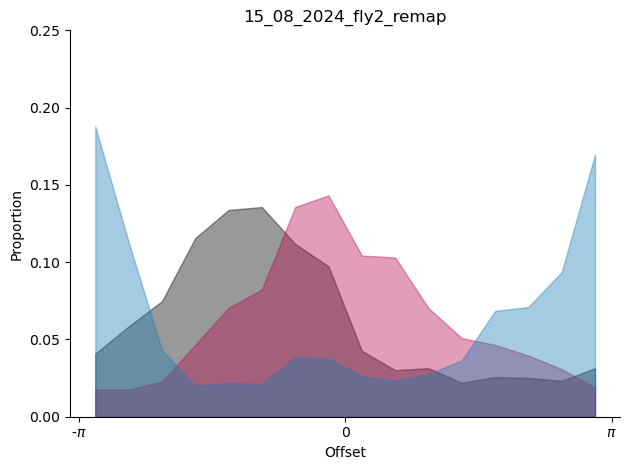

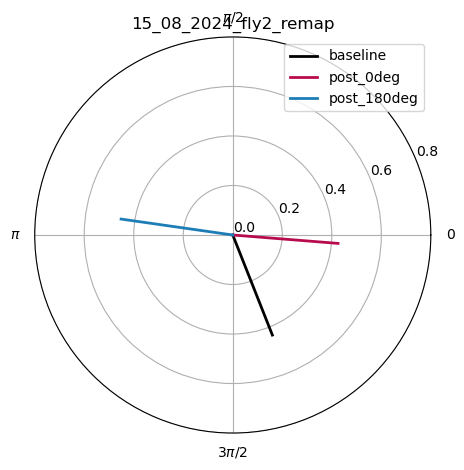

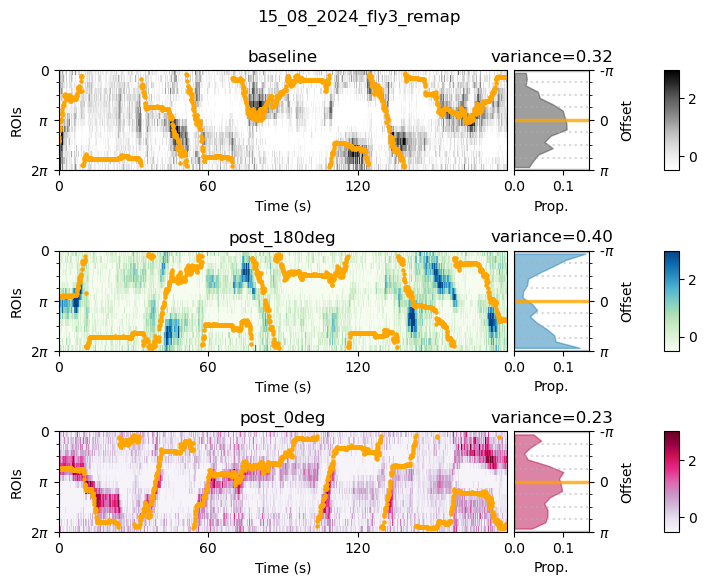

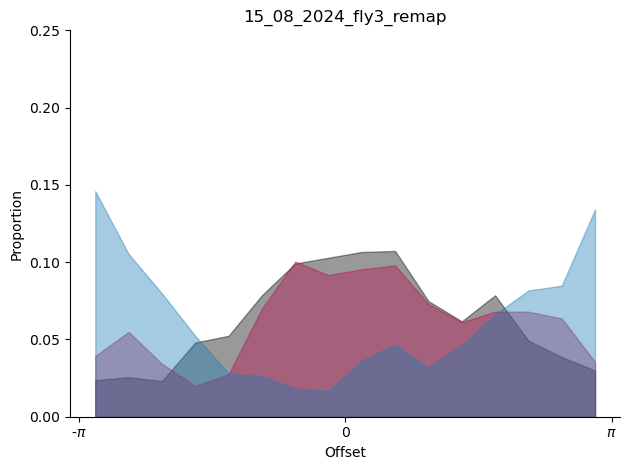

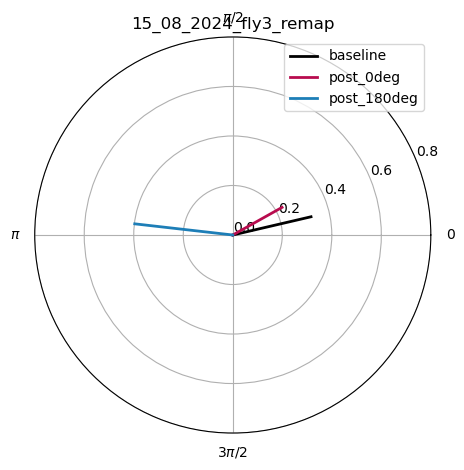

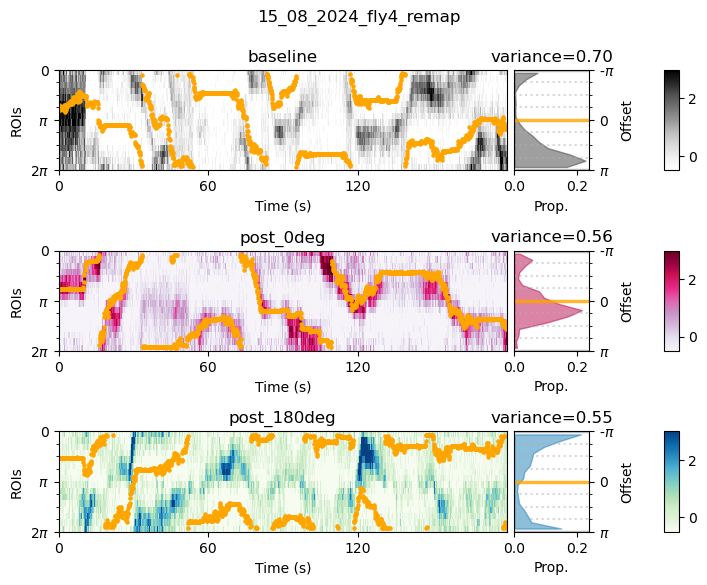

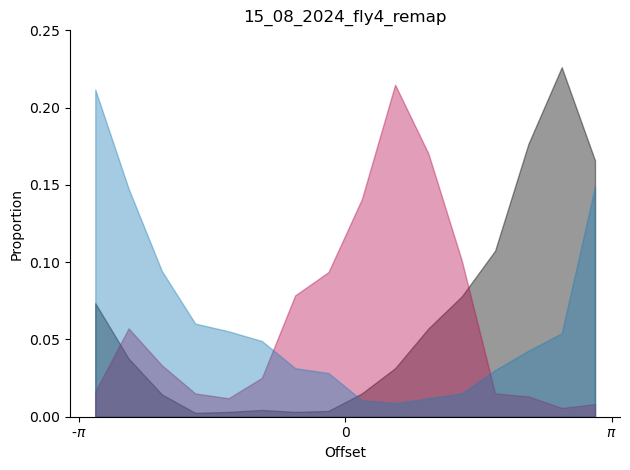

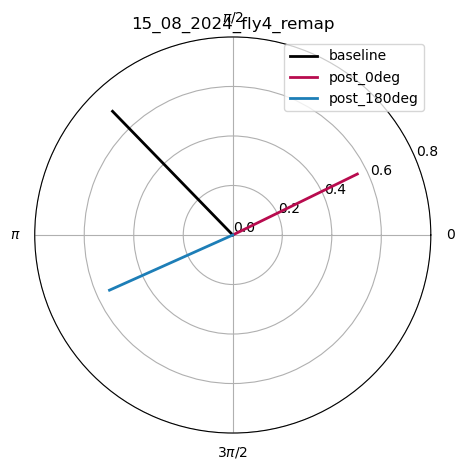

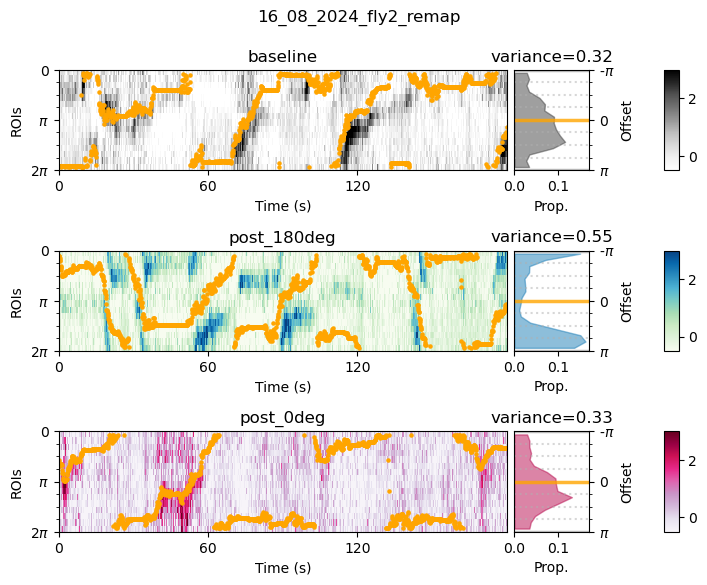

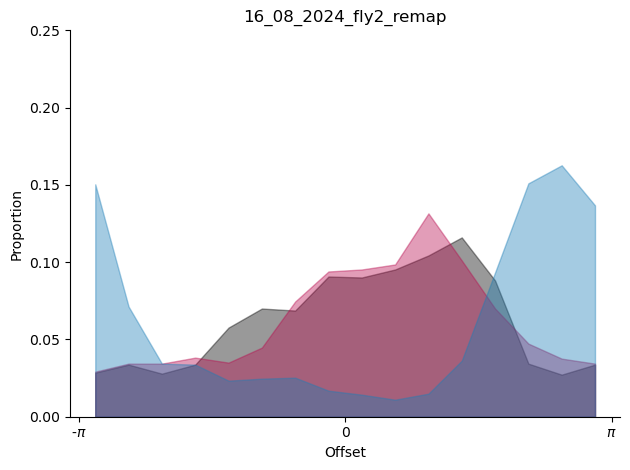

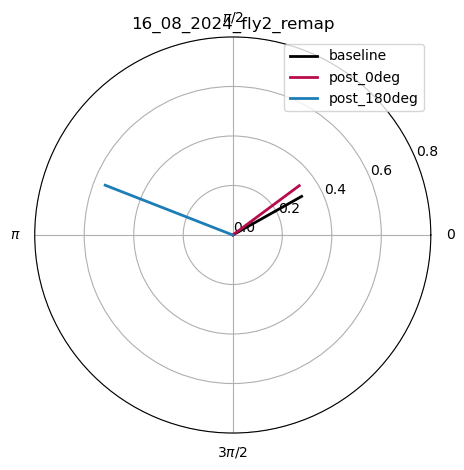

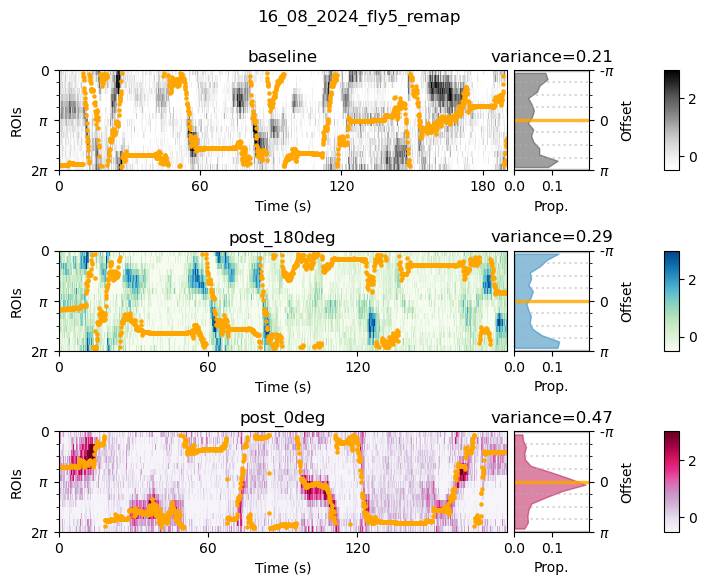

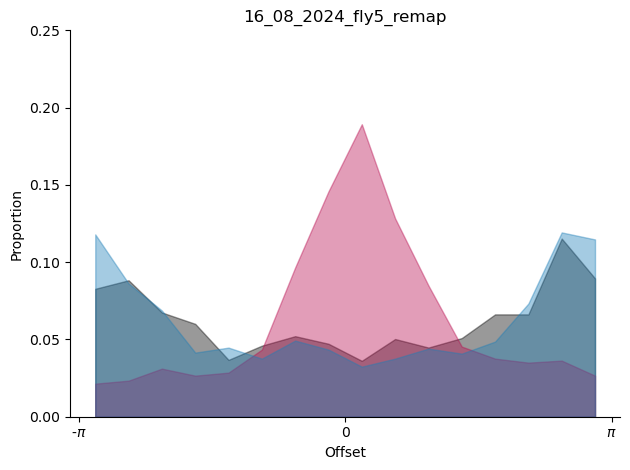

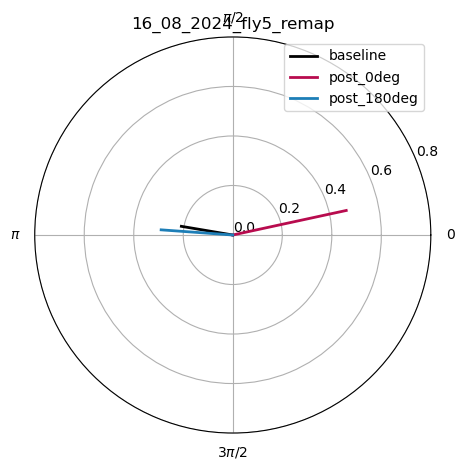

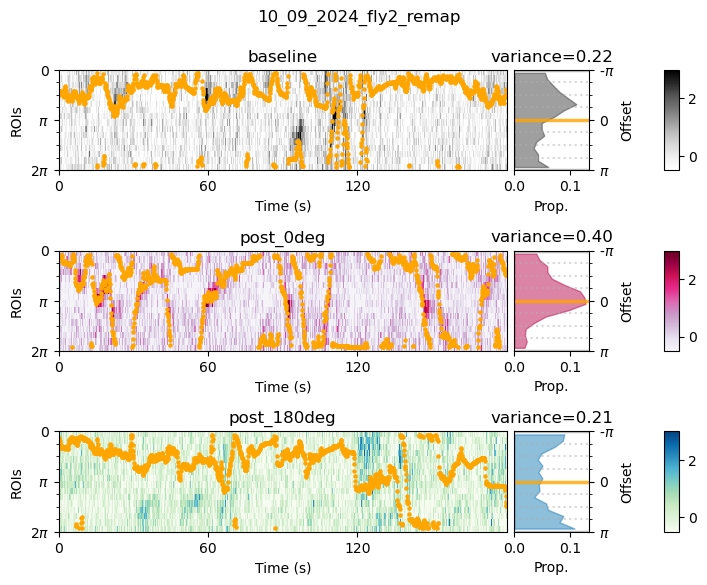

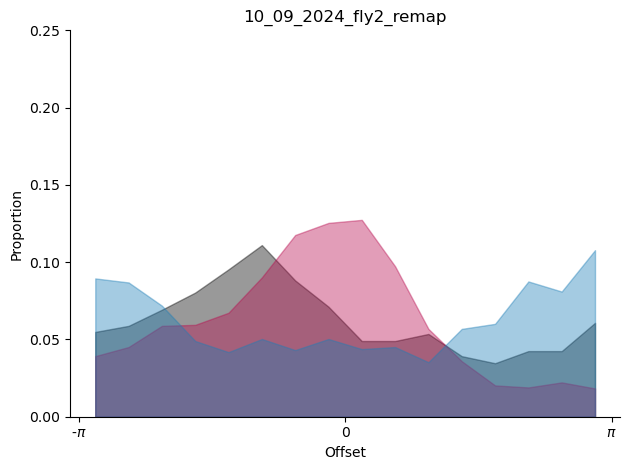

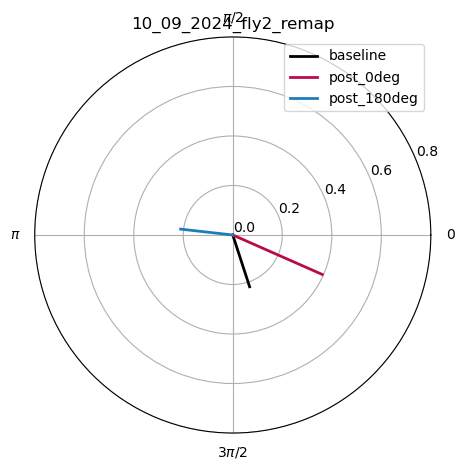

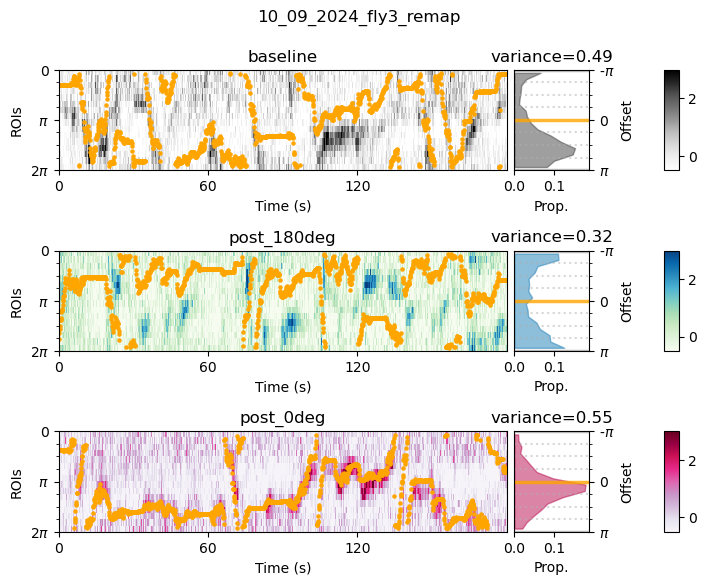

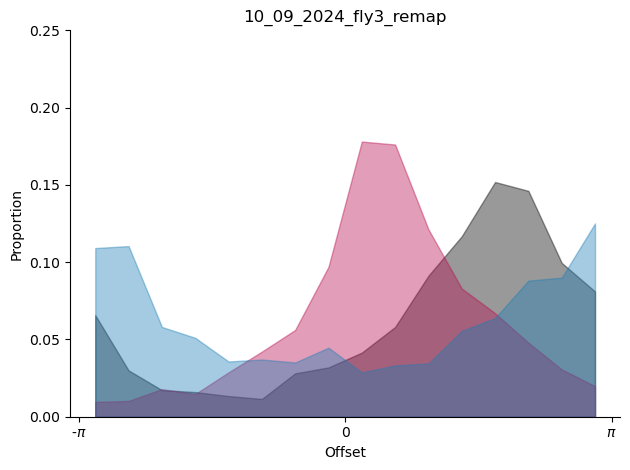

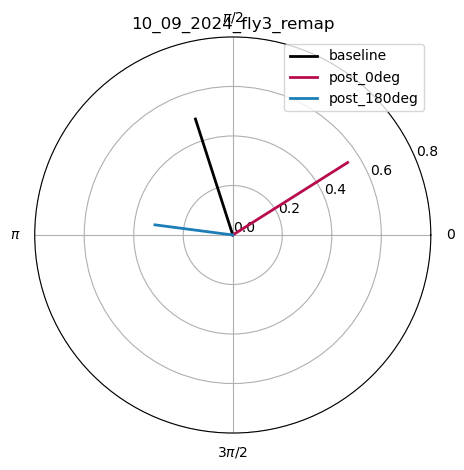

In [35]:
session_folder = figfolder / "sessions"
session_folder.mkdir(parents=True, exist_ok=True)

for fly in remap_flies :

    baseline = sess_df.loc[(sess_df['fly_id']==fly) & (sess_df['scan_type']=='baseline')]
    post_0deg = sess_df.loc[(sess_df['fly_id']==fly) & (sess_df['scan_type']=='post_0deg')]
    post_180deg = sess_df.loc[(sess_df['fly_id']==fly) & (sess_df['scan_type']=='post_180deg')]
    
    if baseline.shape[0]>0 and post_0deg.shape[0]>0 and post_180deg.shape[0]>0:

        ts_dict = {'fly': fly,
                'baseline': nmp.session.GetTS(load_row(baseline.iloc[0])),
                'post_0deg': nmp.session.GetTS(load_row(post_0deg.iloc[0])),
                'post_180deg': nmp.session.GetTS(load_row(post_180deg.iloc[0]))}
        
        sess_inds = (
            int(baseline.iloc[0]['sess'][-3:]), 
            int(post_0deg.iloc[0]['sess'][-3:]), 
            int(post_180deg.iloc[0]['sess'][-3:]), 
        )
        sess_order = np.argsort(sess_inds)

        # fig_heatmaps, ax_heatmaps = nmp.remapping.plot_sess_heatmaps(ts_dict)
        fig_heatmaps, ax_heatmaps = nmp.remapping.plot_sess_heatmaps_w_hist(ts_dict, sess_order=sess_order)
        (fig_hist, ax_hist), (fig_polar, ax_polar) = nmp.remapping.plot_sess_histograms(ts_dict)

        
        fly_folder = session_folder / fly
        fly_folder.mkdir(parents=True, exist_ok=True)
        
        fig_heatmaps.savefig(fly_folder / "heatmaps.pdf")
        fig_hist.savefig(fly_folder / "offset_hist.pdf")
        fig_polar.savefig(fly_folder / "offset_polar.pdf")